![Banner](./img/AI_Special_Program_Banner.jpg)  


# Solutions to exercise Visualization I
---

Create a [Stacked Bar Chart](https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html) based on the IMDB data. You should visualize the *average sales per year*, grouped by the transformed ratings `Rating_cat` from cell 5. Create the chart according to the **IBCS standard**.

*Notes:*

* Since you will probably have to make some adjustments to the display, it is advisable to use Matplotlib
* You can generate the required data using `pivot_table()`. The use of the parameter `fill_value` could be helpful here
* The representation you are looking for is a logical extension of the bar chart from cell 13

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/imdb_ratings.csv')

In [3]:
df['Rating_cat'] = pd.cut(df['Rating'], bins=3, labels=['Low', 'Medium', 'High'])

In [4]:
df_pivot_rating = df.pivot_table(index=['Year'], columns='Rating_cat',values=['Revenue (Millions)'], aggfunc=np.mean, fill_value=0.0)

Resolve the MultiIndex in the columns:

In [5]:
df_pivot_rating.columns = df_pivot_rating.columns.droplevel().tolist()

In [6]:
df_pivot_rating

,Low,Medium,High
Year,,,
2006,0.00,80.120000,89.728148
2007,0.00,78.001111,90.105500
2008,14.17,101.004500,100.632000
2009,9.35,103.375000,119.864375
2010,0.00,90.132273,114.478286
2011,0.00,76.875909,93.517250
2012,0.00,68.188750,131.844000
2013,0.00,53.813030,107.107091
2014,0.00,63.782791,103.034118


Extract values as an array:

In [7]:
years = df_pivot_rating.index.values
low_values = df_pivot_rating['Low'].values
medium_values = df_pivot_rating['Medium'].values
high_values = df_pivot_rating['High'].values

Plot:

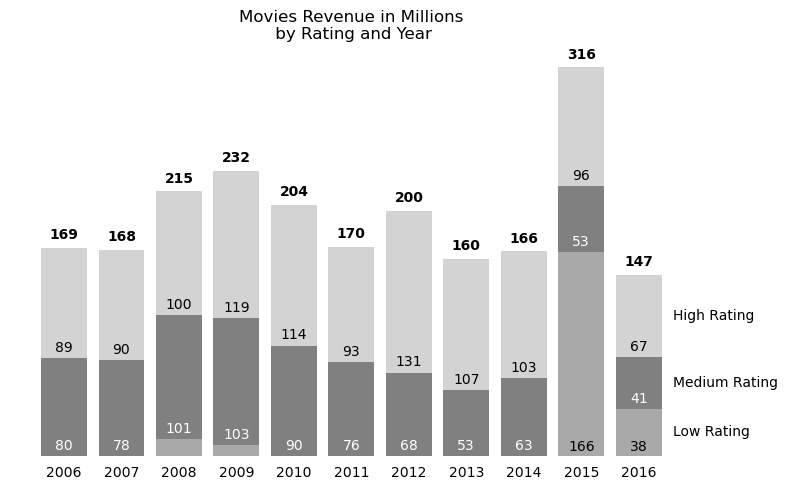

In [8]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100, tight_layout=False)

ax.bar(years, low_values, color='darkgrey')
ax.bar(years, medium_values, bottom=low_values, color='grey')
ax.bar(years, high_values, bottom=low_values+medium_values, color='lightgrey')

ax.set_title('Movies Revenue in Millions\n by Rating and Year')
ax.set_frame_on(False) # delete axes
ax.set_xticks(years) # show all labels
ax.tick_params(bottom=False,labelbottom=True, labelleft=False, left=False) # delete ticks and ticklabels

# annotate categories
ax.text(years[-1]+0.6, low_values[-1]/2, 'Low Rating', verticalalignment='center')
ax.text(years[-1]+0.6, low_values[-1]+medium_values[-1]/2, 'Medium Rating', verticalalignment='center')
ax.text(years[-1]+0.6, low_values[-1]+medium_values[-1]+high_values[-1]/2, 'High Rating', verticalalignment='center')

# annotate values
for year, low, medium, high in zip(years,low_values, medium_values, high_values):
    if low > 20: # show only bigger /visible values
        ax.text(year, 4, str(int(low)), color='k', horizontalalignment="center")
    ax.text(year, low+5, str(int(medium)), color='w', horizontalalignment="center")
    ax.text(year, low+medium+5, str(int(high)), color='k', horizontalalignment="center")
    ax.text(year, low+medium+high+7, str(int(low+medium+high)), color='k',horizontalalignment="center", weight='bold')

plt.show()